# Tutorial
Shows how to load some packages from time_templates and predict signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from time_templates.utilities.atmosphere import Atmosphere
from time_templates.templates.universality.names import DICT_COMP_LABELS, eMUON, eEM_PURE, eEM_MU, eEM_HAD, DICT_COMP_COLORS

from time_templates.templates.total_model import total_signal_model, total_trace_model

## Predict total signal and traces
See docstring in `time_templates.templates.total_model.py` for more info.

Signal is the sum over 4 componeents $k$ like so:
\begin{align}
S(t_i, r, \psi, \theta, E, X_{\rm max}, R^\mu) =& \sum\limits_k (1 + \alpha_k(R^\mu -1)) S_k(E, \theta,
X_{\rm max}, r=1000\, \mathrm{m}) \\
                                          &\times \rho_k(r, \psi, \theta, X_{\rm max})
                                                \times h_k(t_i, r, \psi, \theta, E, X_{\rm max}) \Delta t.
\end{align},

First line determines $S(1000)$, $\rho$ is the signal density ($\rho = S/S(1000)$) and $h(t)$ is the time trace pdf (with convolution of detector response). Also the atmosphere should be given

Total signal 177.6 VEM Charge


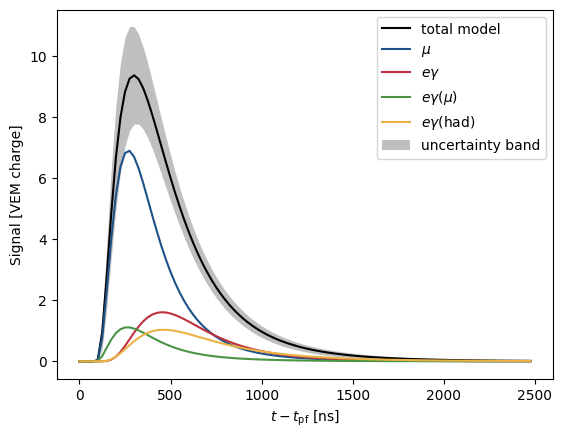

In [4]:
r = 800 #in m
psi = np.pi/2 #in rad
theta = np.deg2rad(40) #in rad
lgE = 19.3
Xmax = 750 #g/cm^2
Rmu = 1.2 #Nmu/Nmu(EPOS, proton, E, Xmax, theta)

dt = 25
t = np.arange(0, 2500, dt) #time wrt plane front, mind the bin size

atm = Atmosphere(model=21) #21 = Malargue March
# atm = Atmosphere(gps_seconds=1104105616) #looks in GDAS database

print(f"Total signal {total_signal_model(r, psi, theta, lgE, Xmax, Rmu, atm=atm, comps=False):.1f} VEM Charge")

f, ax = plt.subplots(1)

ax.plot(t, total_trace_model(t, r, psi, theta, lgE, Xmax, Rmu, atm=atm, comps=False), 'k-', label='total model')

#with comps=True, split into the 4 components
comp_traces = total_trace_model(t, r, psi, theta, lgE, Xmax, Rmu, atm=atm, comps=True)
for comp in comp_traces:
    ax.plot(t, comp_traces[comp], DICT_COMP_COLORS[comp], label=f'${DICT_COMP_LABELS[comp]}$')
    
#Can also return variance (only only total signal). 
#The variance is calculated by assumin muons have a fluctuating track-lenght but otherwise create 1 VEM and electrons/phtons create 1/25 VEM
#Note that below is not really correct, because sig-std can be < 0
sig, var = total_trace_model(t, r, psi, theta, lgE, Xmax, Rmu, atm=atm, comps=False, return_var=True)

ax.fill_between(t, sig-np.sqrt(var), sig+np.sqrt(var), color='k', lw=0, alpha=0.25, label='uncertainty band')

ax.legend()
ax.set_ylabel('Signal [VEM charge]')
ax.set_xlabel('$t - t_{\\rm pf}$ [ns]');

The functions `total_signal_model` and `total_trace_model` only work non-vectorized (except for `t` nothing can be an array). To make a LDF plot do like the following:

Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tested/made for r < 500 or r > 2000, although some +- is probably OK
Warning, not tes

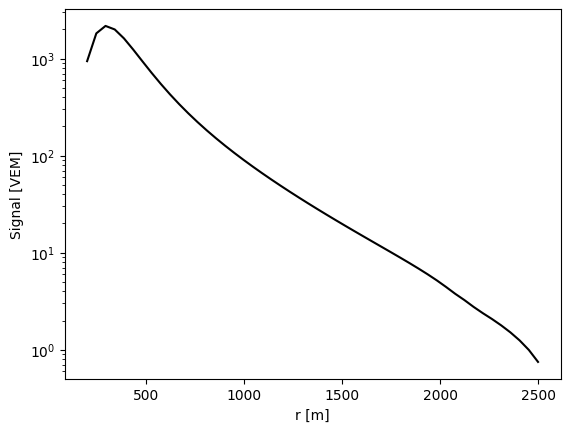

In [26]:
f, ax = plt.subplots(1)

rs = np.linspace(200, 2500)
psi = np.pi/2

ax.plot(rs, [total_signal_model(r, psi, theta, lgE, Xmax, Rmu, atm=atm, comps=False) for r in rs], color='k')
ax.set_ylabel('Signal [VEM]')
ax.set_xlabel('r [m]')
ax.set_yscale('log')

Model will give a warning if you outside of the range 500 < r < 2000